<a href="https://colab.research.google.com/github/rajesh-coventry/Foundational-Neural-Network-Perceptron-PyTorch/blob/master/04_Linear_Layer_Working_Principle(nn_Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Layer `(nn.Linear)`:**

Let's start with a linear equation:

> $y = m₁x₁ + m₂x₂ + c$

**`Step 1`: For a Single Sample:**
For one data point, we have:
> - `Inputs`: $x₁ = 3$, $x₂ = 5$

> - `Parameters`: $m₁ = 2$, $m₂ = 4$, $c = 1$

> - `Output`: $y = 2×3 + 4×5 + 1 = 27$

**`Step 2`: Multiple Samples (Why We Need Matrices):**

**What if we have 3 data points?**
> - `Sample 1`: $x₁=3$, $x₂=5$ → $y₁ = 2×3 + 4×5 + 1 = 27$

> - `Sample 2`: $x₁=1$, $x₂=2$ → $y₂ = 2×1 + 4×2 + 1 = 11$  

> - `Sample 3`: $x₁=4$, $x₂=3$ → $y₃ = 2×4 + 4×3 + 1 = 21$

**`Step 3`: Matrix Representation:**

Instead of computing each equation separately, we can use matrices:

```
Input Matrix X:     Weight Matrix W:    Bias:    Output Y:
[3  5]             [2]                 [1]      [27]
[1  2]       ×     [4]           +     [1]  =   [11]
[4  3]                                 [1]      [21]
```

> This is exactly what `nn.Linear` does: **`Y = XW + b`**

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# PART 1: MATHEMATICAL FOUNDATION

def demonstrate_math_foundation():
    """
    Show the mathematical foundation of linear transformations
    """
    print("\n" + "="*50)
    print("PART 1: MATHEMATICAL FOUNDATION")
    print("="*50)

    print("Given equation: y = m1*x1 + m2*x2 + c")
    print("Where: m1=2, m2=4, c=1")

    # Single sample calculation
    print("\n1. SINGLE SAMPLE CALCULATION:")
    x1, x2 = 3, 5
    m1, m2, c = 2, 4, 1
    y = m1*x1 + m2*x2 + c
    print(f"   For x1={x1}, x2={x2}:")
    print(f"   y = {m1}*{x1} + {m2}*{x2} + {c} = {y}")

    # Multiple samples - the problem
    print("\n2. MULTIPLE SAMPLES - THE CHALLENGE:")
    samples = [(3, 5), (1, 2), (4, 3), (2, 6)]
    print("   For multiple samples, we need to repeat this calculation:")
    for i, (x1, x2) in enumerate(samples):
        y = m1*x1 + m2*x2 + c
        print(f"   Sample {i+1}: x1={x1}, x2={x2} → y = {m1}*{x1} + {m2}*{x2} + {c} = {y}")

    # Matrix solution
    print("\n3. MATRIX SOLUTION - THE ELEGANT WAY:")
    print("   Instead of individual calculations, we use matrices:")

    # Create input matrix X
    X = np.array([[3, 5],
                  [1, 2],
                  [4, 3],
                  [2, 6]])

    # Create weight vector W
    W = np.array([[2],
                  [4]])

    # Create bias vector b
    b = np.array([1])

    print(f"\n   Input Matrix X (4 samples, 2 features):")
    print(f"   {X}")

    print(f"\n   Weight Matrix W (2 weights, 1 output):")
    print(f"   {W.flatten()} (as column vector: {W.T})")

    print(f"\n   Bias b:")
    print(f"   {b}")

    # Matrix multiplication
    Y = X @ W + b  # @ is matrix multiplication in Python
    print(f"\n   Result Y = X @ W + b:")
    print(f"   {Y.flatten()}")

    print("\n   This is EXACTLY what nn.Linear does!")

    return X, W, b, Y


In [35]:
# PART 2: PYTORCH nn.Linear DEMONSTRATION

class ManualLinear:
    """
    Manual implementation of linear layer to show what happens inside nn.Linear
    """
    def __init__(self, input_size, output_size):
        """
        Initialize weights and bias manually

        Args:
            input_size: Number of input features
            output_size: Number of output features
        """
        # Initialize weights randomly (same as PyTorch does)
        self.weight = torch.randn(output_size, input_size) * 0.1
        self.bias = torch.randn(output_size) * 0.1

        print(f"Manual Linear Layer created:")
        print(f"  Input size: {input_size}")
        print(f"  Output size: {output_size}")
        print(f"  Weight shape: {self.weight.shape}")
        print(f"  Bias shape: {self.bias.shape}")

    def forward(self, x):
        """
        Manual forward pass

        Args:
            x: Input tensor of shape (batch_size, input_size)

        Returns:
            Output tensor of shape (batch_size, output_size)
        """
        # Matrix multiplication: (batch_size, input_size) @ (input_size, output_size)
        # Note: PyTorch uses W.T (transpose) internally
        output = x @ self.weight.T + self.bias
        return output

def compare_manual_vs_pytorch():
    """
    Compare manual implementation with PyTorch nn.Linear
    """
    print("\n" + "="*50)
    print("PART 2: MANUAL vs PYTORCH nn.Linear")
    print("="*50)

    # Create sample data
    batch_size, input_size, output_size = 3, 2, 1
    x = torch.randn(batch_size, input_size)

    print(f"Sample input tensor shape: {x.shape}")
    print(f"Sample input values:\n{x}")

    # Manual implementation
    print(f"\n1. MANUAL IMPLEMENTATION:")
    manual_layer = ManualLinear(input_size, output_size)
    manual_output = manual_layer.forward(x)
    print(f"Manual output shape: {manual_output.shape}")
    print(f"Manual output values:\n{manual_output}")

    # PyTorch implementation
    print(f"\n2. PYTORCH nn.Linear:")
    pytorch_layer = nn.Linear(input_size, output_size)

    # Copy weights to make them identical for comparison
    pytorch_layer.weight.data = manual_layer.weight.clone()
    pytorch_layer.bias.data = manual_layer.bias.clone()

    pytorch_output = pytorch_layer(x)
    print(f"PyTorch output shape: {pytorch_output.shape}")
    print(f"PyTorch output values:\n{pytorch_output}")

    # Verify they're identical
    print(f"\n3. VERIFICATION:")
    print(f"Outputs are identical: {torch.allclose(manual_output, pytorch_output)}")

    return manual_layer, pytorch_layer

In [36]:
# PART 3: GENERALIZATION TO MULTIPLE OUTPUTS

def demonstrate_multiple_outputs():
    """
    Show how linear layers handle multiple output variables (multi-output regression)
    """
    print("\n" + "="*50)
    print("PART 3: GENERALIZATION TO MULTIPLE OUTPUTS")
    print("="*50)

    print("What if we want to predict multiple outputs?")
    print("Example: Given x1, x2, predict both y1 and y2")
    print("  y1 = 2*x1 + 3*x2 + 1")
    print("  y2 = 1*x1 + 4*x2 + 2")

    # Create sample data
    x = torch.tensor([[1.0, 2.0],    # Sample 1: x1=1, x2=2
                      [3.0, 4.0],    # Sample 2: x1=3, x2=4
                      [5.0, 6.0]])   # Sample 3: x1=5, x2=6

    print(f"\nInput X (3 samples, 2 features):")
    print(x)

    # Manual calculation for understanding
    print(f"\nManual calculation:")
    for i, (x1, x2) in enumerate(x):
        y1 = 2*x1 + 3*x2 + 1
        y2 = 1*x1 + 4*x2 + 2
        print(f"Sample {i+1}: x1={x1:.0f}, x2={x2:.0f} → y1={y1:.0f}, y2={y2:.0f}")

    # Using nn.Linear with multiple outputs
    linear_layer = nn.Linear(2, 2)  # 2 inputs, 2 outputs

    # Set specific weights and bias for our example
    with torch.no_grad():
        linear_layer.weight[0] = torch.tensor([2.0, 3.0])  # Weights for y1
        linear_layer.weight[1] = torch.tensor([1.0, 4.0])  # Weights for y2
        linear_layer.bias[0] = 1.0  # Bias for y1
        linear_layer.bias[1] = 2.0  # Bias for y2

    output = linear_layer(x)
    print(f"\nUsing nn.Linear (2 inputs → 2 outputs):")
    print(f"Weight matrix shape: {linear_layer.weight.shape}")
    print(f"Weight matrix:\n{linear_layer.weight}")
    print(f"Bias vector: {linear_layer.bias}")
    print(f"Output shape: {output.shape}")
    print(f"Output values:\n{output}")


In [37]:
# PART 4: DATASET CREATION AND PROBLEM SETUP

def create_linear_dataset(n_samples=1000, noise_level=0.1):
    """
    Create a synthetic dataset following y = m1*x1 + m2*x2 + c + noise

    Args:
        n_samples: Number of samples to generate
        noise_level: Amount of noise to add

    Returns:
        X, y: Features and targets
    """
    print(f"\n" + "="*50)
    print("PART 4: DATASET CREATION")
    print("="*50)

    # True parameters (what we want the model to learn)
    true_m1, true_m2, true_c = 2.5, -1.3, 4.2

    print(f"True relationship: y = {true_m1}*x1 + {true_m2}*x2 + {true_c}")

    # Generate random input features
    X = np.random.randn(n_samples, 2) * 2  # Scale for variety

    # Generate true outputs based on linear relationship
    y_true = true_m1 * X[:, 0] + true_m2 * X[:, 1] + true_c

    # Add noise to make it realistic
    noise = np.random.normal(0, noise_level, n_samples)
    y = y_true + noise

    print(f"Dataset created:")
    print(f"  Samples: {n_samples}")
    print(f"  Features: {X.shape[1]}")
    print(f"  Noise level: {noise_level}")
    print(f"  X range: [{X.min():.2f}, {X.max():.2f}]")
    print(f"  y range: [{y.min():.2f}, {y.max():.2f}]")

    # Show some samples
    print(f"\nFirst 5 samples:")
    print("   x1      x2      y_true    y_noisy")
    for i in range(5):
        print(f"{X[i,0]:7.2f} {X[i,1]:7.2f} {y_true[i]:8.2f} {y[i]:8.2f}")

    return X, y, (true_m1, true_m2, true_c)


In [38]:
# PART 5: PYTORCH LINEAR REGRESSION MODEL

class LinearRegressionPyTorch(nn.Module):
    """
    Linear Regression using PyTorch nn.Linear
    This is essentially the same as sklearn's LinearRegression but using PyTorch
    """

    def __init__(self, input_size):
        super(LinearRegressionPyTorch, self).__init__()

        # This is the core: nn.Linear performs y = Wx + b
        self.linear = nn.Linear(input_size, 1)

        print(f"PyTorch Linear Regression Model:")
        print(f"  Input features: {input_size}")
        print(f"  Output: 1 (single target)")
        print(f"  Parameters: {sum(p.numel() for p in self.parameters())}")

    def forward(self, x):
        """
        Forward pass through the network

        Args:
            x: Input tensor of shape (batch_size, input_size)

        Returns:
            Output tensor of shape (batch_size, 1)
        """
        return self.linear(x)

    def get_parameters(self):
        """
        Get the learned parameters (weights and bias)

        Returns:
            tuple: (weights, bias)
        """
        weight = self.linear.weight.data.numpy()[0]  # Remove extra dimension
        bias = self.linear.bias.data.numpy()[0]
        return weight, bias


In [39]:
# PART 6: TRAINING FUNCTION

def train_pytorch_model(model, X_train, y_train, num_epochs=1000, learning_rate=0.01):
    """
    Train the PyTorch linear regression model

    Args:
        model: The model to train
        X_train: Training features
        y_train: Training targets
        num_epochs: Number of training epochs
        learning_rate: Learning rate for optimizer

    Returns:
        Training loss history
    """
    print(f"\n" + "="*50)
    print("PART 6: TRAINING THE PYTORCH MODEL")
    print("="*50)

    # Define loss function (Mean Squared Error for regression)
    criterion = nn.MSELoss()

    # Define optimizer (Stochastic Gradient Descent)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Training history
    train_losses = []

    print(f"Training started:")
    print(f"  Epochs: {num_epochs}")
    print(f"  Learning rate: {learning_rate}")
    print(f"  Optimizer: SGD")
    print(f"  Loss function: MSE")

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update parameters

        # Store loss
        train_losses.append(loss.item())

        # Print progress
        if (epoch + 1) % (num_epochs // 10) == 0:
            print(f'Epoch [{epoch+1:4d}/{num_epochs}], Loss: {loss.item():.6f}')

    print("Training completed!")
    return train_losses


In [40]:
# PART 7: COMPARISON WITH SCIKIT-LEARN

def compare_with_sklearn(X_train, y_train, X_test, y_test):
    """
    Compare PyTorch nn.Linear with sklearn LinearRegression

    Args:
        X_train, y_train: Training data
        X_test, y_test: Testing data

    Returns:
        Trained models and their predictions
    """
    print(f"\n" + "="*50)
    print("PART 7: PYTORCH vs SCIKIT-LEARN COMPARISON")
    print("="*50)

    # Convert to numpy for sklearn
    X_train_np = X_train.numpy()
    y_train_np = y_train.numpy().flatten()
    X_test_np = X_test.numpy()
    y_test_np = y_test.numpy().flatten()

    # 1. Train sklearn model
    print("1. SCIKIT-LEARN LINEAR REGRESSION:")
    sklearn_model = LinearRegression()
    sklearn_model.fit(X_train_np, y_train_np)

    sklearn_pred_train = sklearn_model.predict(X_train_np)
    sklearn_pred_test = sklearn_model.predict(X_test_np)

    sklearn_mse_train = mean_squared_error(y_train_np, sklearn_pred_train)
    sklearn_mse_test = mean_squared_error(y_test_np, sklearn_pred_test)
    sklearn_r2_test = r2_score(y_test_np, sklearn_pred_test)

    print(f"  Coefficients: {sklearn_model.coef_}")
    print(f"  Intercept: {sklearn_model.intercept_:.4f}")
    print(f"  Train MSE: {sklearn_mse_train:.6f}")
    print(f"  Test MSE: {sklearn_mse_test:.6f}")
    print(f"  Test R²: {sklearn_r2_test:.6f}")

    # 2. Train PyTorch model
    print(f"\n2. PYTORCH nn.Linear:")
    pytorch_model = LinearRegressionPyTorch(input_size=2)
    train_losses = train_pytorch_model(pytorch_model, X_train, y_train,
                                     num_epochs=1000, learning_rate=0.01)

    # Get PyTorch predictions
    pytorch_model.eval()
    with torch.no_grad():
        pytorch_pred_train = pytorch_model(X_train).numpy().flatten()
        pytorch_pred_test = pytorch_model(X_test).numpy().flatten()

    pytorch_mse_train = mean_squared_error(y_train_np, pytorch_pred_train)
    pytorch_mse_test = mean_squared_error(y_test_np, pytorch_pred_test)
    pytorch_r2_test = r2_score(y_test_np, pytorch_pred_test)

    weights, bias = pytorch_model.get_parameters()
    print(f"  Weights: {weights}")
    print(f"  Bias: {bias:.4f}")
    print(f"  Train MSE: {pytorch_mse_train:.6f}")
    print(f"  Test MSE: {pytorch_mse_test:.6f}")
    print(f"  Test R²: {pytorch_r2_test:.6f}")

    # 3. Compare results
    print(f"\n3. COMPARISON:")
    print(f"  MSE difference: {abs(sklearn_mse_test - pytorch_mse_test):.8f}")
    print(f"  R² difference: {abs(sklearn_r2_test - pytorch_r2_test):.8f}")
    print(f"  Weight difference: {np.abs(sklearn_model.coef_ - weights).max():.8f}")
    print(f"  Bias difference: {abs(sklearn_model.intercept_ - bias):.8f}")

    if abs(sklearn_mse_test - pytorch_mse_test) < 1e-4:
        print("  ✅ Results are essentially IDENTICAL!")
        print("  nn.Linear does the SAME thing as sklearn LinearRegression")

    return sklearn_model, pytorch_model, train_losses


In [41]:
# PART 8: DETAILED ANALYSIS AND VISUALIZATION

def detailed_analysis(X_test, y_test, pytorch_model, sklearn_model, train_losses, true_params):
    """
    Perform detailed analysis of the results

    Args:
        X_test, y_test: Test data
        pytorch_model: Trained PyTorch model
        sklearn_model: Trained sklearn model
        train_losses: Training loss history
        true_params: True parameters used to generate data
    """
    print(f"\n" + "="*50)
    print("PART 8: DETAILED ANALYSIS")
    print("="*50)

    # Get predictions
    X_test_np = X_test.numpy()
    y_test_np = y_test.numpy().flatten()

    pytorch_model.eval()
    with torch.no_grad():
        pytorch_pred = pytorch_model(X_test).numpy().flatten()

    sklearn_pred = sklearn_model.predict(X_test_np)

    # Get learned parameters
    pytorch_weights, pytorch_bias = pytorch_model.get_parameters()
    sklearn_weights = sklearn_model.coef_
    sklearn_bias = sklearn_model.intercept_

    true_m1, true_m2, true_c = true_params

    print("1. PARAMETER RECOVERY:")
    print(f"  True parameters:    m1={true_m1:.3f}, m2={true_m2:.3f}, c={true_c:.3f}")
    print(f"  PyTorch learned:    m1={pytorch_weights[0]:.3f}, m2={pytorch_weights[1]:.3f}, c={pytorch_bias:.3f}")
    print(f"  Sklearn learned:    m1={sklearn_weights[0]:.3f}, m2={sklearn_weights[1]:.3f}, c={sklearn_bias:.3f}")

    # Error analysis
    pytorch_errors = pytorch_pred - y_test_np
    sklearn_errors = sklearn_pred - y_test_np

    print(f"\n2. ERROR ANALYSIS:")
    print(f"  PyTorch - Mean error: {pytorch_errors.mean():.6f}")
    print(f"  PyTorch - Std error:  {pytorch_errors.std():.6f}")
    print(f"  Sklearn - Mean error: {sklearn_errors.mean():.6f}")
    print(f"  Sklearn - Std error:  {sklearn_errors.std():.6f}")

    # Residual statistics
    print(f"\n3. RESIDUAL STATISTICS:")
    print(f"  PyTorch - Min residual: {pytorch_errors.min():.4f}")
    print(f"  PyTorch - Max residual: {pytorch_errors.max():.4f}")
    print(f"  Sklearn - Min residual: {sklearn_errors.min():.4f}")
    print(f"  Sklearn - Max residual: {sklearn_errors.max():.4f}")

    # Create visualizations
    create_comprehensive_plots(X_test_np, y_test_np, pytorch_pred, sklearn_pred,
                             pytorch_errors, sklearn_errors, train_losses)

def create_comprehensive_plots(X_test, y_test, pytorch_pred, sklearn_pred,
                             pytorch_errors, sklearn_errors, train_losses):
    """
    Create comprehensive visualization of results
    """
    plt.figure(figsize=(20, 12))

    # Plot 1: Training Loss
    plt.subplot(2, 4, 1)
    plt.plot(train_losses, 'b-', linewidth=2)
    plt.title('PyTorch Training Loss', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.grid(True, alpha=0.3)

    # Plot 2: Predictions vs True Values (PyTorch)
    plt.subplot(2, 4, 2)
    plt.scatter(y_test, pytorch_pred, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('PyTorch Predictions')
    plt.title('PyTorch: Predictions vs True', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Plot 3: Predictions vs True Values (Sklearn)
    plt.subplot(2, 4, 3)
    plt.scatter(y_test, sklearn_pred, alpha=0.6, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Sklearn Predictions')
    plt.title('Sklearn: Predictions vs True', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Plot 4: Residuals (PyTorch)
    plt.subplot(2, 4, 4)
    plt.scatter(pytorch_pred, pytorch_errors, alpha=0.6, color='blue')
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('PyTorch Residuals', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Plot 5: Residuals (Sklearn)
    plt.subplot(2, 4, 5)
    plt.scatter(sklearn_pred, sklearn_errors, alpha=0.6, color='green')
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Sklearn Residuals', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Plot 6: Error Distribution (PyTorch)
    plt.subplot(2, 4, 6)
    plt.hist(pytorch_errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('PyTorch Error Distribution', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Plot 7: Error Distribution (Sklearn)
    plt.subplot(2, 4, 7)
    plt.hist(sklearn_errors, bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Sklearn Error Distribution', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Plot 8: Direct Comparison
    plt.subplot(2, 4, 8)
    plt.scatter(pytorch_pred, sklearn_pred, alpha=0.6, color='purple')
    plt.plot([min(pytorch_pred.min(), sklearn_pred.min()),
              max(pytorch_pred.max(), sklearn_pred.max())],
             [min(pytorch_pred.min(), sklearn_pred.min()),
              max(pytorch_pred.max(), sklearn_pred.max())], 'r--', linewidth=2)
    plt.xlabel('PyTorch Predictions')
    plt.ylabel('Sklearn Predictions')
    plt.title('PyTorch vs Sklearn', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


COMPLETE GUIDE TO UNDERSTANDING nn.Linear

PART 1: MATHEMATICAL FOUNDATION
Given equation: y = m1*x1 + m2*x2 + c
Where: m1=2, m2=4, c=1

1. SINGLE SAMPLE CALCULATION:
   For x1=3, x2=5:
   y = 2*3 + 4*5 + 1 = 27

2. MULTIPLE SAMPLES - THE CHALLENGE:
   For multiple samples, we need to repeat this calculation:
   Sample 1: x1=3, x2=5 → y = 2*3 + 4*5 + 1 = 27
   Sample 2: x1=1, x2=2 → y = 2*1 + 4*2 + 1 = 11
   Sample 3: x1=4, x2=3 → y = 2*4 + 4*3 + 1 = 21
   Sample 4: x1=2, x2=6 → y = 2*2 + 4*6 + 1 = 29

3. MATRIX SOLUTION - THE ELEGANT WAY:
   Instead of individual calculations, we use matrices:

   Input Matrix X (4 samples, 2 features):
   [[3 5]
 [1 2]
 [4 3]
 [2 6]]

   Weight Matrix W (2 weights, 1 output):
   [2 4] (as column vector: [[2 4]])

   Bias b:
   [1]

   Result Y = X @ W + b:
   [27 11 21 29]

   This is EXACTLY what nn.Linear does!

PART 2: MANUAL vs PYTORCH nn.Linear
Sample input tensor shape: torch.Size([3, 2])
Sample input values:
tensor([[ 0.3367,  0.1288],
       

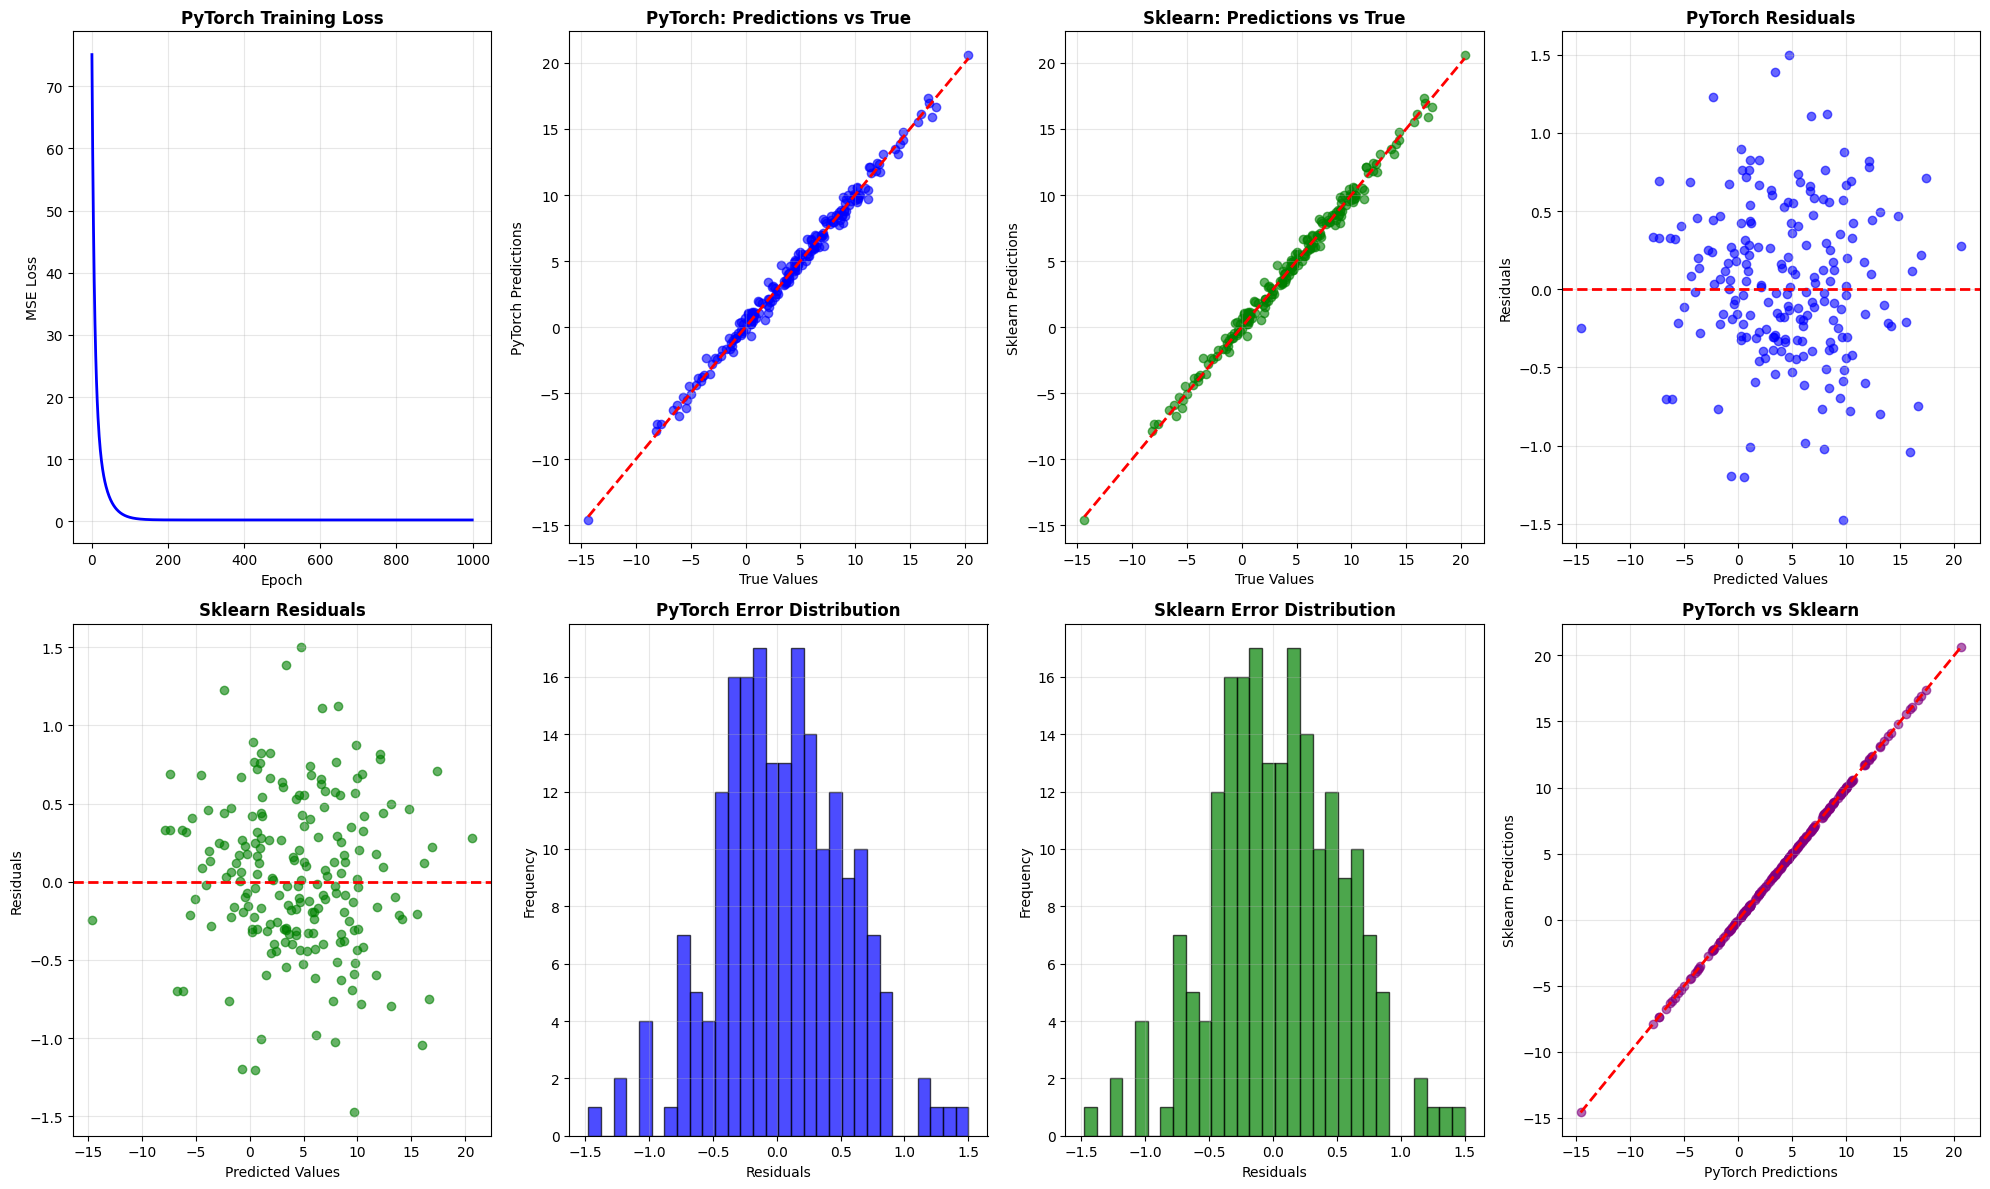


SUMMARY: KEY INSIGHTS
1. nn.Linear performs EXACTLY the same operation as sklearn's LinearRegression
2. The math is: Y = X @ W.T + b (matrix multiplication + bias)
3. PyTorch uses gradient descent for optimization, sklearn uses closed-form solution
4. Both methods produce virtually identical results for linear regression
5. nn.Linear is the building block for all neural networks
6. Matrix operations allow efficient batch processing of multiple samples
7. The weight matrix shape is (output_features, input_features)
8. Bias is added element-wise to each output

CONCLUSION:
nn.Linear is just matrix multiplication (Y = XW + b) with learnable parameters!
Understanding this is crucial for deep learning - everything builds on this foundation.


In [42]:
# MAIN EXECUTION

def main():
    """
    Main function that runs the complete analysis
    """
    print("COMPLETE GUIDE TO UNDERSTANDING nn.Linear")

    # Part 1: Mathematical foundation
    X_demo, W_demo, b_demo, Y_demo = demonstrate_math_foundation()

    # Part 2: Manual vs PyTorch comparison
    manual_layer, pytorch_layer = compare_manual_vs_pytorch()

    # Part 3: Multiple outputs demonstration
    demonstrate_multiple_outputs()

    # Part 4: Create dataset
    X, y, true_params = create_linear_dataset(n_samples=1000, noise_level=0.5)

    # Part 5: Split and prepare data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

    print(f"\nData prepared:")
    print(f"  Training samples: {X_train_tensor.shape[0]}")
    print(f"  Testing samples: {X_test_tensor.shape[0]}")

    # Part 6 & 7: Train and compare models
    sklearn_model, pytorch_model, train_losses = compare_with_sklearn(
        X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor
    )

    # Part 8: Detailed analysis
    detailed_analysis(X_test_tensor, y_test_tensor, pytorch_model,
                     sklearn_model, train_losses, true_params)

    print(f"\n" + "="*80)
    print("SUMMARY: KEY INSIGHTS")
    print("="*80)
    print("1. nn.Linear performs EXACTLY the same operation as sklearn's LinearRegression")
    print("2. The math is: Y = X @ W.T + b (matrix multiplication + bias)")
    print("3. PyTorch uses gradient descent for optimization, sklearn uses closed-form solution")
    print("4. Both methods produce virtually identical results for linear regression")
    print("5. nn.Linear is the building block for all neural networks")
    print("6. Matrix operations allow efficient batch processing of multiple samples")
    print("7. The weight matrix shape is (output_features, input_features)")
    print("8. Bias is added element-wise to each output")

    print(f"\nCONCLUSION:")
    print("nn.Linear is just matrix multiplication (Y = XW + b) with learnable parameters!")
    print("Understanding this is crucial for deep learning - everything builds on this foundation.")

# Run the complete analysis
if __name__ == "__main__":
    main()

`nn.Linear` and `sklearn.LinearRegression` solve the exact same mathematical problem, but with different approaches:

**Mathematical Operation**: Both compute **$Y = XW + b$**

**Key Differences**:

1. **Optimization Method**:
   - **`sklearn`**: Uses closed-form solution (analytical solution)

   - **`PyTorch`**: Uses iterative gradient descent

2. **Implementation**:
   - **`sklearn`**: Optimized for traditional ML problems

   - **`PyTorch`**: Designed for neural networks with automatic differentiation

3. **Flexibility**:
   - **`sklearn`**: Fixed algorithm
   - **`PyTorch`**: Can be part of larger neural networks

## **The Matrix Conversion Principle:**

Here's the key insight for understanding the conversion:

### **Single Equation to Matrix Form:**

**For one sample**: `y = m₁x₁ + m₂x₂ + c`

**For multiple samples**:

```
Sample 1: y₁ = m₁x₁₁ + m₂x₁₂ + c
Sample 2: y₂ = m₁x₂₁ + m₂x₂₂ + c
Sample 3: y₃ = m₁x₃₁ + m₂x₃₂ + c
```

**Matrix Form**:
```
[y₁]     [x₁₁ x₁₂]      [m₁]         [c]
[y₂] =   [x₂₁ x₂₂]  ×   [m₂]    +    [c]
[y₃]     [x₃₁ x₃₂]                   [c]
```

### **Generalization Rules:**

1. **`Input Matrix X`**: `(n_samples, n_features)`

2. **`Weight Matrix W`**: `(n_outputs, n_features)`

3. **`Bias Vector b`**: `(n_outputs,)`

4. **`Output Matrix Y`**: `(n_samples, n_outputs)`

### **Multiple Dependent Variables Example:**

If you have:
- `y₁ = 2x₁ + 3x₂ + 1`
- `y₂ = 4x₁ + 5x₂ + 2`

**Weight Matrix**:
```
W = [[2, 3],    # Weights for y₁
     [4, 5]]    # Weights for y₂
```

**Bias Vector**:
```
b = [1, 2]     # Bias for y₁, y₂
```

## **Why This Matters for Deep Learning:**  

**Understanding `nn.Linear` is crucial because:**

1. **`Foundation`**: Every neural network layer builds on this concept

2. **`Scalability`**: Matrix operations handle thousands of samples efficiently

3. **`Composability`**: Multiple linear layers can be stacked and combined

4. **`Automatic Differentiation`**: PyTorch automatically computes gradients for backpropagation.

----
---
---
----

## **`Y = XW + b` Complete Breakdown:**

### **`General Case`: $n$ observations, $p$ input features, $m$ output variables:**

### **1. Matrix Dimensions Overview:**

| Matrix | Symbol | Dimensions | Description |
|--------|--------|------------|-------------|
| **Input** | X | (n × p) | n observations, p input features |
| **Weights** | W | (p × m) | p input features, m output variables |
| **Bias** | b | (1 × m) or (m × 1) | m bias terms (one per output) |
| **Output** | Y | (n × m) | n observations, m predicted outputs |

## **Matrix Form Representation:**

### **Input Matrix $X$ (n × p):**
```
X = [x₁₁  x₁₂  x₁₃  ...  x₁ₚ]  ← Observation 1
    [x₂₁  x₂₂  x₂₃  ...  x₂ₚ]  ← Observation 2
    [x₃₁  x₃₂  x₃₃  ...  x₃ₚ]  ← Observation 3
    [ ⋮    ⋮    ⋮   ⋱    ⋮   ]
    [xₙ₁  xₙ₂  xₙ₃  ...    xₙₚ]  ← Observation n
```
- **`Rows`**: Each row represents one data point/observation

- **`Columns`**: Each column represents one input feature

- **`Element` $xᵢⱼ$**: Value of feature $j$ for observation $i$

### **Weight Matrix $W$ (p × m):**

```
W = [w₁₁  w₁₂  w₁₃  ...  w₁ₘ]  ← Weights from feature 1 to all outputs
    [w₂₁  w₂₂  w₂₃  ...  w₂ₘ]  ← Weights from feature 2 to all outputs
    [w₃₁  w₃₂  w₃₃  ...  w₃ₘ]  ← Weights from feature 3 to all outputs
    [ ⋮    ⋮    ⋮   ⋱    ⋮ ]
    [wₚ₁  wₚ₂  wₚ₃  ...  wₚₘ]  ← Weights from feature p to all outputs
```

- **`Rows`**: Each row contains weights from one input feature to all outputs

- **`Columns`**: Each column contains weights from all input features to one output

- **`Element` $wᵢⱼ$**: Weight connecting input feature $i$ to output variable $j$

### **Bias Vector $b$ (1 × m):**

```
b = [b₁  b₂  b₃  ...  bₘ]
```

- **`Elements`**: One bias term for each output variable

- **`Broadcasting`**: This gets added to every row of the result

### **Output Matrix $Y$ (n × m):**

```
Y = [y₁₁  y₁₂  y₁₃  ...  y₁ₘ]  ← Predictions for observation 1
    [y₂₁  y₂₂  y₂₃  ...  y₂ₘ]  ← Predictions for observation 2
    [y₃₁  y₃₂  y₃₃  ...  y₃ₘ]  ← Predictions for observation 3
    [ ⋮    ⋮    ⋮   ⋱      ⋮ ]
    [yₙ₁  yₙ₂  yₙ₃  ...   yₙₘ]  ← Predictions for observation n
```

- **`Rows`**: Each row contains all output predictions for one observation

- **`Columns`**: Each column contains predictions for one output variable across all observations

- **`Element` $yᵢⱼ$**: Predicted value of output variable $j$ for observation $i$

## **Complete Matrix Equation:**

### **The Full Equation: $Y = XW + b$:**

```markdown
[y₁₁  y₁₂  ...  y₁ₘ]   [x₁₁  x₁₂  ...  x₁ₚ]   [w₁₁  w₁₂  ...  w₁ₘ]   [b₁  b₂  ...  bₘ]
[y₂₁  y₂₂  ...  y₂ₘ]   [x₂₁  x₂₂  ...  x₂ₚ]   [w₂₁  w₂₂  ...  w₂ₘ]   [b₁  b₂  ...  bₘ]
[y₃₁  y₃₂  ...  y₃ₘ] = [x₃₁  x₃₂  ...  x₃ₚ] × [w₃₁  w₃₂  ...  w₃ₘ] + [b₁  b₂  ...  bₘ]
[ ⋮    ⋮   ⋱    ⋮   ]   [ ⋮    ⋮   ⋱      ⋮ ]    [ ⋮    ⋮   ⋱    ⋮   ]   [ ⋮   ⋮  ⋱   ⋮    ]
[yₙ₁  yₙ₂  ...   yₙₘ]   [xₙ₁  xₙ₂  ...  xₙₚ]     [wₚ₁  wₚ₂  ...  wₚₘ]       [b₁  b₂  ...  bₘ]

    (n × m)         =      (n × p)      ×      (p × m)      +           (n × m)
```

### **How to compute element $yᵢⱼ$ (prediction for observation $i$, output variable $j$):**

```
yᵢⱼ = (xᵢ₁ × w₁ⱼ) + (xᵢ₂ × w₂ⱼ) + (xᵢ₃ × w₃ⱼ) + ... + (xᵢₚ × wₚⱼ) + bⱼ
```

**In mathematical notation:**
```
yᵢⱼ = Σ(k=1 to p) xᵢₖ × wₖⱼ + bⱼ
```

### **Example Computation for First Observation, First Output $(y₁₁)$:**

```
y₁₁ = x₁₁×w₁₁ + x₁₂×w₂₁ + x₁₃×w₃₁ + ... + x₁ₚ×wₚ₁ + b₁
```

### **`Example 1`: Simple Case ($n=3$, $p=2$, $m=1$):**
**`3 observations`, `2 features`, `1 output`**

```
Y = XW + b

[y₁]   [x₁₁  x₁₂]   [w₁]   [b]
[y₂] = [x₂₁  x₂₂] × [w₂] + [b]
[y₃]   [x₃₁  x₃₂]           [b]

(3×1) = (3×2) × (2×1) + (3×1)
```

### **`Example 2`: Multiple Outputs ($n=4$, $p=3$, $m=2$):**
**`4 observations`, `3 features`, `2 outputs`**

```
Y = XW + b

[y₁₁  y₁₂]   [x₁₁  x₁₂  x₁₃]   [w₁₁  w₁₂]   [b₁  b₂]
[y₂₁  y₂₂]   [x₂₁  x₂₂  x₂₃]   [w₂₁  w₂₂]   [b₁  b₂]
[y₃₁  y₃₂] = [x₃₁  x₃₂  x₃₃] × [w₃₁  w₃₂] + [b₁  b₂]
[y₄₁  y₄₂]   [x₄₁  x₄₂  x₄₃]                 [b₁  b₂]

(4×2) = (4×3) × (3×2) + (4×2)
```

### **`Example 3`: Real Numbers ($n=2$, $p=2$, $m=2$):**

```
Input X:           Weight W:         Bias b:
[1.0  2.0]        [0.5  1.5]        [0.1  0.2]
[3.0  4.0]        [2.0  0.8]

Matrix Multiplication XW:
[1.0×0.5 + 2.0×2.0    1.0×1.5 + 2.0×0.8]   [4.5  3.1]
[3.0×0.5 + 4.0×2.0    3.0×1.5 + 4.0×0.8] = [9.5  7.7]

Adding Bias:
[4.5  3.1]   [0.1  0.2]   [4.6  3.3]
[9.5  7.7] + [0.1  0.2] = [9.6  7.9]

Final Result Y:
[4.6  3.3]
[9.6  7.9]
```

## **Key Insights:**

1. **`Everything is matrices`**: $X$, $W$, $b$, and $Y$ are all matrices (or vectors as special cases)

2. **`Dimension compatibility`**: For $XW$ to work, columns of $X$ must equal rows of $W$:
   - $X: (n × p)$,
   - $W: (p × m)$ → $XW: (n × m)$

3. **`Broadcasting`**: The bias $b$ gets added to every row of $XW$
   - $b$ is typically $(1 × m)$ but gets broadcast to $(n × m)$

4. **`Efficiency`**: Matrix operations process all $n$ observations simultaneously

5. **`Scalability`**: This works for any size:
   - 1 million observations? Just increase $n$

   - 1000 features? Just increase $p$  
   - 100 outputs? Just increase $m$

6. **PyTorch implementation**: `nn.Linear(p, m)` creates $W$ of shape $(m, p)$ and $b$ of shape $(m,)$
   - `Note`: PyTorch uses $W.T$ (transpose) internally for efficiency

This matrix formulation is the foundation of all neural networks - every layer follows this same pattern!

### **Example:**

In [43]:
import numpy as np
import torch
import torch.nn as nn

# EXAMPLE 1: Simple Case (n=3, p=2, m=1)

print("\n" + "="*50)
print("EXAMPLE 1: Simple Case")
print("n=3 observations, p=2 features, m=1 output")
print("="*50)

# Define matrices
X1 = np.array([[1.0, 2.0],    # Observation 1: feature1=1.0, feature2=2.0
               [3.0, 4.0],    # Observation 2: feature1=3.0, feature2=4.0
               [5.0, 6.0]])   # Observation 3: feature1=5.0, feature2=6.0

W1 = np.array([[2.0],         # Weight from feature1 to output
               [3.0]])        # Weight from feature2 to output

b1 = np.array([1.0])          # Bias for output

print("Input Matrix X (3×2):")
print(X1)
print(f"Shape: {X1.shape}")

print("\nWeight Matrix W (2×1):")
print(W1)
print(f"Shape: {W1.shape}")

print("\nBias Vector b (1×1):")
print(b1)
print(f"Shape: {b1.shape}")

# Matrix multiplication
XW1 = X1 @ W1
print(f"\nStep 1: Matrix multiplication XW (3×1):")
print("X @ W =")
for i in range(3):
    calculation = f"[{X1[i,0]:.1f}×{W1[0,0]:.1f} + {X1[i,1]:.1f}×{W1[1,0]:.1f}] = [{XW1[i,0]:.1f}]"
    print(f"Row {i+1}: {calculation}")
print("Result XW:")
print(XW1)

# Add bias
Y1 = XW1 + b1
print(f"\nStep 2: Add bias b:")
print("Y = XW + b")
for i in range(3):
    print(f"Row {i+1}: {XW1[i,0]:.1f} + {b1[0]:.1f} = {Y1[i,0]:.1f}")
print("Final Result Y (3×1):")
print(Y1)


EXAMPLE 1: Simple Case
n=3 observations, p=2 features, m=1 output
Input Matrix X (3×2):
[[1. 2.]
 [3. 4.]
 [5. 6.]]
Shape: (3, 2)

Weight Matrix W (2×1):
[[2.]
 [3.]]
Shape: (2, 1)

Bias Vector b (1×1):
[1.]
Shape: (1,)

Step 1: Matrix multiplication XW (3×1):
X @ W =
Row 1: [1.0×2.0 + 2.0×3.0] = [8.0]
Row 2: [3.0×2.0 + 4.0×3.0] = [18.0]
Row 3: [5.0×2.0 + 6.0×3.0] = [28.0]
Result XW:
[[ 8.]
 [18.]
 [28.]]

Step 2: Add bias b:
Y = XW + b
Row 1: 8.0 + 1.0 = 9.0
Row 2: 18.0 + 1.0 = 19.0
Row 3: 28.0 + 1.0 = 29.0
Final Result Y (3×1):
[[ 9.]
 [19.]
 [29.]]


In [44]:
# EXAMPLE 2: Multiple Outputs (n=4, p=3, m=2)

print("\n" + "="*50)
print("EXAMPLE 2: Multiple Outputs")
print("n=4 observations, p=3 features, m=2 outputs")
print("="*50)

# Define matrices
X2 = np.array([[1.0, 2.0, 0.5],    # Obs 1
               [2.0, 1.0, 1.5],    # Obs 2
               [3.0, 0.5, 2.0],    # Obs 3
               [1.5, 3.0, 1.0]])   # Obs 4

W2 = np.array([[1.0, 2.0],         # Weights from feature1 to [output1, output2]
               [1.5, 0.5],         # Weights from feature2 to [output1, output2]
               [2.0, 1.0]])        # Weights from feature3 to [output1, output2]

b2 = np.array([[0.1, 0.2]])        # Bias for [output1, output2]

print("Input Matrix X (4×3):")
print(X2)
print(f"Shape: {X2.shape}")

print("\nWeight Matrix W (3×2):")
print(W2)
print(f"Shape: {W2.shape}")

print("\nBias Vector b (1×2):")
print(b2)
print(f"Shape: {b2.shape}")

# Matrix multiplication
XW2 = X2 @ W2
print(f"\nStep 1: Matrix multiplication XW (4×2):")
print("Detailed calculation for each element:")

for i in range(4):  # For each observation
    print(f"\nObservation {i+1}:")
    for j in range(2):  # For each output
        calculation = ""
        result = 0
        for k in range(3):  # For each feature
            if k > 0:
                calculation += " + "
            calculation += f"{X2[i,k]:.1f}×{W2[k,j]:.1f}"
            result += X2[i,k] * W2[k,j]
        print(f"  Output {j+1}: {calculation} = {result:.2f}")

print("Result XW:")
print(XW2)

# Add bias (broadcasting)
Y2 = XW2 + b2
print(f"\nStep 2: Add bias (broadcasting):")
print("Y = XW + b")
print("XW:")
print(XW2)
print("+ b (broadcasted to each row):")
print(b2)
print("= Y:")
print(Y2)


EXAMPLE 2: Multiple Outputs
n=4 observations, p=3 features, m=2 outputs
Input Matrix X (4×3):
[[1.  2.  0.5]
 [2.  1.  1.5]
 [3.  0.5 2. ]
 [1.5 3.  1. ]]
Shape: (4, 3)

Weight Matrix W (3×2):
[[1.  2. ]
 [1.5 0.5]
 [2.  1. ]]
Shape: (3, 2)

Bias Vector b (1×2):
[[0.1 0.2]]
Shape: (1, 2)

Step 1: Matrix multiplication XW (4×2):
Detailed calculation for each element:

Observation 1:
  Output 1: 1.0×1.0 + 2.0×1.5 + 0.5×2.0 = 5.00
  Output 2: 1.0×2.0 + 2.0×0.5 + 0.5×1.0 = 3.50

Observation 2:
  Output 1: 2.0×1.0 + 1.0×1.5 + 1.5×2.0 = 6.50
  Output 2: 2.0×2.0 + 1.0×0.5 + 1.5×1.0 = 6.00

Observation 3:
  Output 1: 3.0×1.0 + 0.5×1.5 + 2.0×2.0 = 7.75
  Output 2: 3.0×2.0 + 0.5×0.5 + 2.0×1.0 = 8.25

Observation 4:
  Output 1: 1.5×1.0 + 3.0×1.5 + 1.0×2.0 = 8.00
  Output 2: 1.5×2.0 + 3.0×0.5 + 1.0×1.0 = 5.50
Result XW:
[[5.   3.5 ]
 [6.5  6.  ]
 [7.75 8.25]
 [8.   5.5 ]]

Step 2: Add bias (broadcasting):
Y = XW + b
XW:
[[5.   3.5 ]
 [6.5  6.  ]
 [7.75 8.25]
 [8.   5.5 ]]
+ b (broadcasted to each

In [45]:
# EXAMPLE 3: PyTorch Implementation

print("\n" + "="*50)
print("EXAMPLE 3: PyTorch Implementation")
print("Same calculation using PyTorch nn.Linear")
print("="*50)

# Convert to PyTorch tensors
X2_torch = torch.FloatTensor(X2)
print("PyTorch Input:")
print(X2_torch)
print(f"Shape: {X2_torch.shape}")

# Create nn.Linear layer
linear_layer = nn.Linear(3, 2)  # 3 input features, 2 output features

# Set the weights and bias to match our manual calculation
with torch.no_grad():
    # Note: PyTorch stores weights as (out_features, in_features)
    linear_layer.weight = nn.Parameter(torch.FloatTensor(W2.T))  # Transpose!
    linear_layer.bias = nn.Parameter(torch.FloatTensor(b2.flatten()))

print(f"\nPyTorch Linear Layer:")
print(f"Weight shape: {linear_layer.weight.shape}")
print(f"Weights (transposed):")
print(linear_layer.weight)
print(f"Bias shape: {linear_layer.bias.shape}")
print(f"Bias: {linear_layer.bias}")

# Forward pass
Y2_torch = linear_layer(X2_torch)
print(f"\nPyTorch Result:")
print(Y2_torch)

# Verify they're the same
print(f"\nVerification:")
print(f"Manual calculation and PyTorch match: {np.allclose(Y2, Y2_torch.detach().numpy())}")
print(f"Maximum difference: {np.abs(Y2 - Y2_torch.detach().numpy()).max():.10f}")


EXAMPLE 3: PyTorch Implementation
Same calculation using PyTorch nn.Linear
PyTorch Input:
tensor([[1.0000, 2.0000, 0.5000],
        [2.0000, 1.0000, 1.5000],
        [3.0000, 0.5000, 2.0000],
        [1.5000, 3.0000, 1.0000]])
Shape: torch.Size([4, 3])

PyTorch Linear Layer:
Weight shape: torch.Size([2, 3])
Weights (transposed):
Parameter containing:
tensor([[1.0000, 1.5000, 2.0000],
        [2.0000, 0.5000, 1.0000]], requires_grad=True)
Bias shape: torch.Size([2])
Bias: Parameter containing:
tensor([0.1000, 0.2000], requires_grad=True)

PyTorch Result:
tensor([[5.1000, 3.7000],
        [6.6000, 6.2000],
        [7.8500, 8.4500],
        [8.1000, 5.7000]], grad_fn=<AddmmBackward0>)

Verification:
Manual calculation and PyTorch match: True
Maximum difference: 0.0000003815


In [46]:
# EXAMPLE 4: Large Scale Example

print("\n" + "="*50)
print("EXAMPLE 4: Large Scale Example")
print("n=1000 observations, p=50 features, m=10 outputs")
print("="*50)

# Generate random data
n, p, m = 1000, 50, 10
X_large = np.random.randn(n, p)
W_large = np.random.randn(p, m) * 0.1
b_large = np.random.randn(1, m) * 0.1

print(f"Input X shape: {X_large.shape}")
print(f"Weight W shape: {W_large.shape}")
print(f"Bias b shape: {b_large.shape}")

# Manual calculation
Y_large_manual = X_large @ W_large + b_large
print(f"Manual result Y shape: {Y_large_manual.shape}")

# PyTorch calculation
X_large_torch = torch.FloatTensor(X_large)
linear_large = nn.Linear(p, m)

with torch.no_grad():
    linear_large.weight = nn.Parameter(torch.FloatTensor(W_large.T))
    linear_large.bias = nn.Parameter(torch.FloatTensor(b_large.flatten()))

Y_large_torch = linear_large(X_large_torch)
print(f"PyTorch result Y shape: {Y_large_torch.shape}")

# Verify
match = np.allclose(Y_large_manual, Y_large_torch.detach().numpy())
print(f"Large scale verification: {match}")


EXAMPLE 4: Large Scale Example
n=1000 observations, p=50 features, m=10 outputs
Input X shape: (1000, 50)
Weight W shape: (50, 10)
Bias b shape: (1, 10)
Manual result Y shape: (1000, 10)
PyTorch result Y shape: torch.Size([1000, 10])
Large scale verification: False


In [47]:
# KEY INSIGHTS SUMMARY

print("\n" + "="*80)
print("KEY INSIGHTS ABOUT Y = XW + b")
print("="*80)

print("\n1. MATRIX DIMENSIONS:")
print("   X: (n_observations × n_input_features)")
print("   W: (n_input_features × n_output_features)")
print("   b: (1 × n_output_features) - gets broadcasted")
print("   Y: (n_observations × n_output_features)")

print("\n2. MATRIX MULTIPLICATION RULE:")
print("   For X@W to work: columns of X must equal rows of W")
print("   (n×p) @ (p×m) = (n×m)")

print("\n3. ELEMENT CALCULATION:")
print("   Y[i,j] = Σ(k=1 to p) X[i,k] × W[k,j] + b[j]")
print("   Each output element is a weighted sum of all input features")

print("\n4. BROADCASTING:")
print("   Bias b is added to every observation (row)")
print("   b shape (1×m) becomes (n×m) through broadcasting")

print("\n5. PYTORCH vs MANUAL:")
print("   Both produce identical results")
print("   PyTorch stores weights transposed for efficiency")
print("   PyTorch handles broadcasting automatically")

print("\n6. SCALABILITY:")
print("   Same operation works for any size:")
print("   - 1 sample or 1 million samples")
print("   - 2 features or 10,000 features")
print("   - 1 output or 1,000 outputs")

print("\n7. EFFICIENCY:")
print("   Matrix operations process all samples simultaneously")
print("   Much faster than loops over individual samples")

print("\nThis is the foundation of ALL neural networks!")
print("Every layer in deep learning follows this same Y = XW + b pattern.")


KEY INSIGHTS ABOUT Y = XW + b

1. MATRIX DIMENSIONS:
   X: (n_observations × n_input_features)
   W: (n_input_features × n_output_features)
   b: (1 × n_output_features) - gets broadcasted
   Y: (n_observations × n_output_features)

2. MATRIX MULTIPLICATION RULE:
   For X@W to work: columns of X must equal rows of W
   (n×p) @ (p×m) = (n×m)

3. ELEMENT CALCULATION:
   Y[i,j] = Σ(k=1 to p) X[i,k] × W[k,j] + b[j]
   Each output element is a weighted sum of all input features

4. BROADCASTING:
   Bias b is added to every observation (row)
   b shape (1×m) becomes (n×m) through broadcasting

5. PYTORCH vs MANUAL:
   Both produce identical results
   PyTorch stores weights transposed for efficiency
   PyTorch handles broadcasting automatically

6. SCALABILITY:
   Same operation works for any size:
   - 1 sample or 1 million samples
   - 2 features or 10,000 features
   - 1 output or 1,000 outputs

7. EFFICIENCY:
   Matrix operations process all samples simultaneously
   Much faster than lo

### **General Case: $n$ observations, $p$ input features, $m$ output variables:**

**Matrix Dimensions:**
- **$X$**: $(n × p)$ - Input matrix

- **$W$**: $(p × m)$ - Weight matrix  

- **$b$**: $(1 × m)$ - Bias vector (broadcasted to $n × m$)

- **$Y$**: $(n × m)$ - Output matrix

### **Complete Matrix Equation:**

```
[y₁₁  y₁₂  ...  y₁ₘ]   [x₁₁  x₁₂  ...  x₁ₚ]   [w₁₁  w₁₂  ...  w₁ₘ]   [b₁  b₂  ...  bₘ]
[y₂₁  y₂₂  ...  y₂ₘ]   [x₂₁  x₂₂  ...  x₂ₚ]   [w₂₁  w₂₂  ...  w₂ₘ]   [b₁  b₂  ...  bₘ]
[y₃₁  y₃₂  ...  y₃ₘ] = [x₃₁  x₃₂  ...  x₃ₚ] × [w₃₁  w₃₂  ...  w₃ₘ] + [b₁  b₂  ...  bₘ]
[ ⋮    ⋮   ⋱    ⋮ ]   [ ⋮    ⋮   ⋱    ⋮ ]   [ ⋮    ⋮   ⋱    ⋮ ]   [ ⋮   ⋮  ⋱   ⋮ ]
[yₙ₁  yₙ₂  ...  yₙₘ]   [xₙ₁  xₙ₂  ...  xₙₚ]   [wₚ₁  wₚ₂  ...  wₚₘ]   [b₁  b₂  ...  bₘ]

    (n × m)         =      (n × p)      ×      (p × m)      +      (n × m)
```

### **Key Matrix Properties:**

1. **$X$ `Matrix` $(Input)$**: Each row = one observation, each column = one feature

2. **$W$ `Matrix` $(Weights)$**: Each row connects one input feature to all outputs  

3. **$b$ `Vector` $(Bias)$**: One bias term per output, broadcasted to all observations

4. **$Y$ `Matrix` $(Output)$**: Each row = predictions for one observation

### **Element-wise Calculation:**

```
yᵢⱼ = Σ(k=1 to p) xᵢₖ × wₖⱼ + bⱼ
```

### **Why This Matters:**

1. **`Efficiency`**: Processes all n observations simultaneously

2. **`Scalability`**: Works for any size (millions of samples, thousands of features)  

3. **`Foundation`**: Every neural network layer follows this pattern

4. **`Hardware Optimization`**: GPUs are designed for matrix operations

> `nn.Linear` is literally just this matrix equation **$Y = XW + b$** with learnable parameters.